In [1]:
import numpy as np
import cv2
import time
import os
import glob
import matplotlib.pyplot as plt

In [2]:
weights_path = os.path.join("yolo","yolov3.weights")
config_path = os.path.join("yolo","yolov3.cfg")
print("loaded")

loaded


In [3]:
net = cv2.dnn.readNetFromDarknet(config_path,weights_path)

In [4]:
names = net.getLayerNames()

In [5]:
def video(img):
    (H,W) = img.shape[:2]
    layers_names=[]
    for i in net.getUnconnectedOutLayers():
        layers_names.append(names[i - 1])
        
    blob  = cv2.dnn.blobFromImage(img,1/255.0,(416,416),crop = False, swapRB = False)
    net.setInput(blob)

    #calculate runtime of algorithm
    start_t = time.time()
    layers_output = net.forward(layers_names)
    boxes = []
    confidences = []
    classIDs = []
    for output in layers_output:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
        
            if (confidence > 0.85):
                box = detection[:4] * np.array([W,H,W,H])
                bx,by,bw,bh = box.astype("int")
            
                x = (bx - (bw/2))
                y = (by - (bh/2))
            
                boxes.append([x,y, int(bw),int(bh)])
                confidences.append(confidence)
                classIDs.append(classID)
    idxs = cv2.dnn.NMSBoxes(boxes,confidences,0.8,0.8)
    labels_path = os.path.join("yolo","coco.names")
    labels = open(labels_path).read().strip().split("\n")
    if len(idxs) > 0:
        for i in idxs.flatten():
            (x,y) = [boxes[i][0],boxes[i][1]]
            (w,h) = [boxes[i][2],boxes[i][3]]
    
            cv2.rectangle(img,(int(x),int(y)),(int(x+w),int(y+h)),(0,255,255),2)
            cv2.putText(img,"{}: {}".format(labels[classIDs[i]],confidences[i]),(int(x),int(y-5)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,139,139),2)
    
    return img

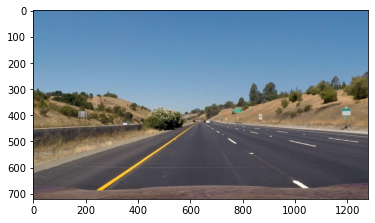

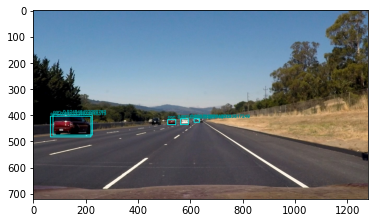

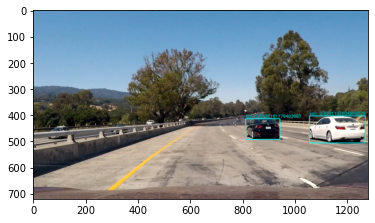

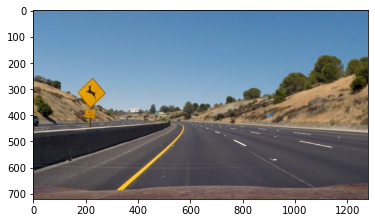

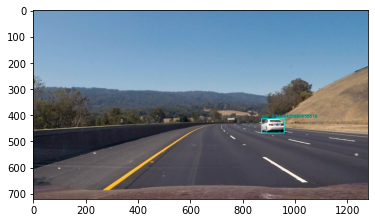

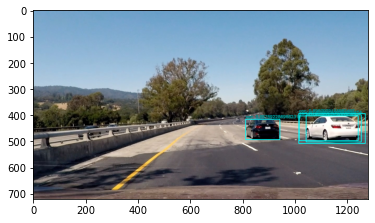

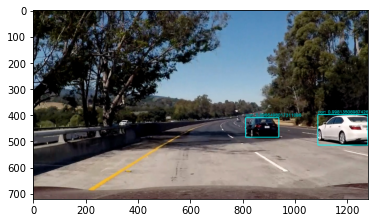

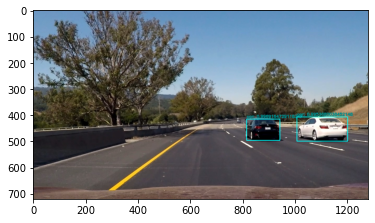

In [6]:
import glob
images = glob.glob('test_images/*.jpg')

for indx, image in enumerate(images):
    plt.imshow(video(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)))
    plt.show()

In [ ]:
from moviepy.editor import VideoFileClip
myclip = VideoFileClip('project_video.mp4')
output_vid = 'output3.mp4'
clip = myclip.fl_image(video)
clip.write_videofile(output_vid, audio=False)
myclip.reader.close()
myclip.close()

Moviepy - Building video output3.mp4.
Moviepy - Writing video output3.mp4



t:  97%|███████████████████████████████████████████████████████████████▏ | 1226/1260 [21:25<00:32,  1.06it/s, now=None]